In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



In [2]:
dataset  = pd.read_csv("Thyroid_Dataset1.csv")

In [3]:
dataset

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.00,0.0,other,0
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,0.0,109.0,0.91,120.0,other,0
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.00,0.0,other,0
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,t,f,f,0.00,0.0,0.0,0.00,0.0,other,0
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,0
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,0
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,0


    on_thyroxine --> 
    t = currently taking thyroxine (thyroid hormone),
    f = not taking.

In [4]:
dataset.shape

(3772, 23)

In [5]:
dataset.isnull().sum()

age                            0
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
referral_source                0
Class                          0
dtype: int64

In [6]:
print("Missing values in 'sex':", dataset['sex'].isnull().sum())

Missing values in 'sex': 150


In [7]:
#fill the sex null value with unknow
dataset['sex'] = dataset['sex'].fillna('unknown')


In [8]:
dataset.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
Class                        0
dtype: int64

In [9]:
dataset.duplicated().sum()

61

In [10]:
# droping the duplicated values 
dataset = dataset.drop_duplicates()


In [11]:
dataset.duplicated().sum()

0

In [12]:
value_count = dataset['Class'].value_counts()
value_count

Class
0    3420
1     291
Name: count, dtype: int64

[]

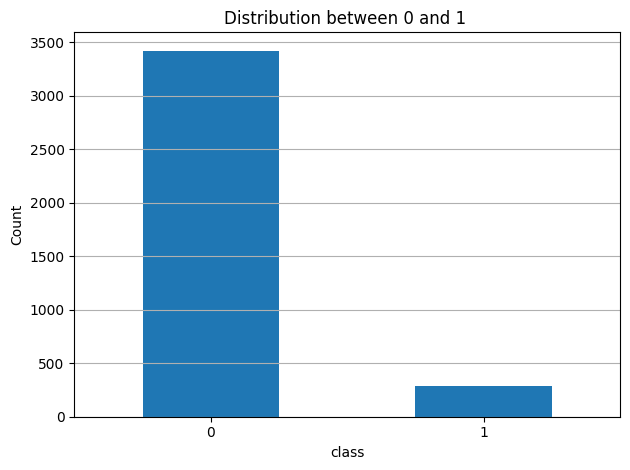

In [13]:
plt.plot(figsize=(2,2))
value_count.plot(kind='bar')
plt.title("Distribution between 0 and 1 ")
plt.xlabel("class")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.tight_layout()
plt.plot()

In [14]:
print("Unique values in Class column:")
print(dataset['Class'].unique())

print("\nValue counts (including all values):")
print(dataset['Class'].value_counts(dropna=False))


Unique values in Class column:
[0 1]

Value counts (including all values):
Class
0    3420
1     291
Name: count, dtype: int64


In [15]:
#labelEncoder to convert string in numeric values 
le = LabelEncoder()

In [16]:
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = le.fit_transform(dataset[col])


C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_10184\3692619227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])
C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_10184\3692619227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])
C:\Users\Rapid IT World\AppData\Local\Temp\ipykernel_10184\3692619227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [17]:
dataset.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,1,0
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,4.10,2.0,102.0,0.00,0.0,4,0
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,0.0,109.0,0.91,120.0,4,0
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175.0,0.00,0.0,4,0
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,3,0


In [18]:
dataset.shape

(3711, 23)

In [19]:
# dependent and independent features
X = dataset.drop('Class',axis=1 )
Y = dataset['Class']

In [20]:
X.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.0,102.0,0.00,0.0,4
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,0.0,109.0,0.91,120.0,4
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,0.00,0.0,4
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,3


In [21]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: Class, Length: 3711, dtype: int64

In [22]:
print(X.shape, Y.shape)

(3711, 22) (3711,)


In [23]:
from sklearn.ensemble import RandomForestClassifier 

In [24]:
# initialization RandomForestClassifier for best feature selectionin from dataset 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X,Y)

RandomForestClassifier(random_state=42)

In [25]:
important_feature = pd.Series(rf.feature_importances_, index=X.columns)
top_feature = important_feature.sort_values(ascending=False).head(7).index.to_list()

In [26]:
top_feature

['TSH', 'TT4', 'FTI', 'on_thyroxine', 'T4U', 'T3', 'age']

In [27]:
important_feature.sort_values(ascending=False).head(7)

TSH             0.633241
TT4             0.080397
FTI             0.076727
on_thyroxine    0.052854
T4U             0.041797
T3              0.033638
age             0.030686
dtype: float64

    TSH (Thyroid Stimulating Hormone)--> low TSH    indicates hyperthyroidism.

    TT4 (Total Thyroxine)--> Measures the total amount of thyroxine (T4) in the blood;  

    FTI (Free Thyroxine Index):--> An estimate of the free (active) T4 hormone in blood

    on_thyroxine--> indicates whether the patient is currently taking synthetic thyroxine (T4 hormone replacement)

    T4U (T3 Uptake or Thyroxine Uptake) --> A test that estimates the binding capacity of thyroid hormone-binding proteins; 

    T3 (Triiodothyronine)--> Active thyroid hormone that regulates metabolism; 

    age --> The age of the patient


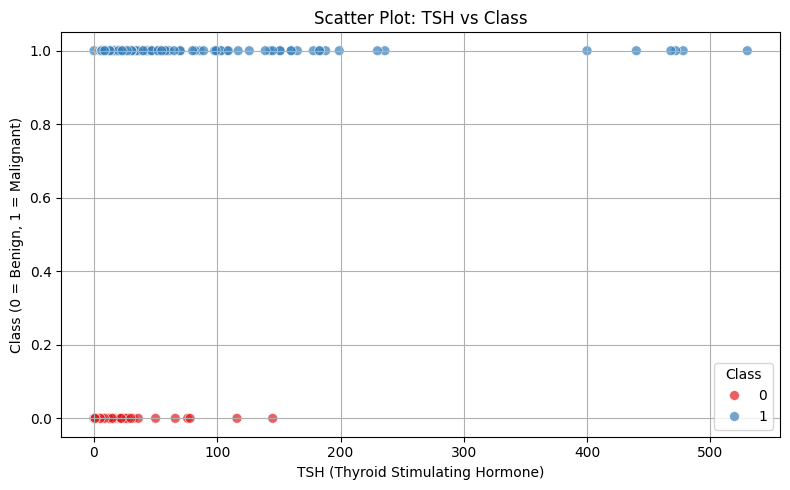

In [28]:

# Assuming your dataset is still called `dataset`
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataset, x='TSH', y='Class', hue='Class', palette='Set1', alpha=0.7, s=50)

plt.title("Scatter Plot: TSH vs Class")
plt.xlabel("TSH (Thyroid Stimulating Hormone)")
plt.ylabel("Class (0 = Benign, 1 = Malignant)")
plt.grid(True)
plt.tight_layout()
plt.show()

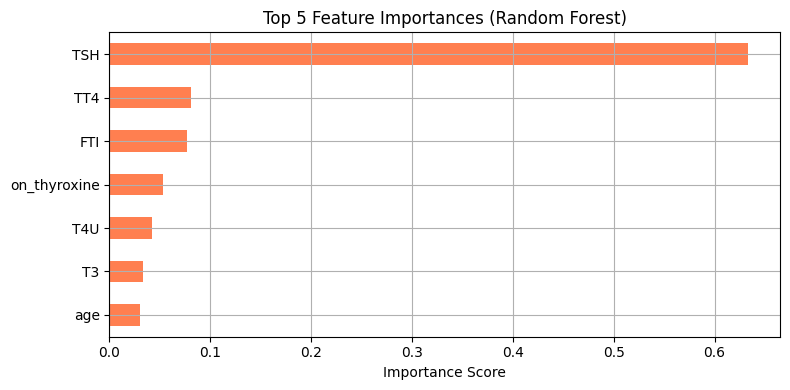

In [29]:
important_feature[top_feature].sort_values().plot(kind='barh', figsize=(8, 4), color='coral')
plt.title("Top 5 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
new_X = X[top_feature]

In [31]:
new_X

,TSH,TT4,FTI,on_thyroxine,T4U,T3,age
0,1.30,125.0,109.0,0,1.14,2.5,41
1,4.10,102.0,0.0,0,0.00,2.0,23
2,0.98,109.0,120.0,0,0.91,0.0,46
3,0.16,175.0,0.0,1,0.00,1.9,70
4,0.72,61.0,70.0,0,0.87,1.2,70
...,...,...,...,...,...,...,...
3767,0.00,0.0,0.0,0,0.00,0.0,30
3768,1.00,124.0,114.0,0,1.08,2.1,68
3769,5.10,112.0,105.0,0,1.07,1.8,74
3770,0.70,82.0,87.0,0,0.94,2.0,72


In [32]:
correlation_matrix = new_X.corr()
correlation_matrix

,TSH,TT4,FTI,on_thyroxine,T4U,T3,age
TSH,1.000000,-0.199242,-0.195063,0.018634,0.055250,-0.079893,-0.050600
TT4,-0.199242,1.000000,0.756754,0.179117,0.547215,0.402466,-0.003773
FTI,-0.195063,0.756754,1.000000,0.147677,0.516321,0.225351,0.086215
on_thyroxine,0.018634,0.179117,0.147677,1.000000,0.044531,-0.113852,0.010490
T4U,0.055250,0.547215,0.516321,0.044531,1.000000,0.271746,-0.025312
T3,-0.079893,0.402466,0.225351,-0.113852,0.271746,1.000000,-0.101106
age,-0.050600,-0.003773,0.086215,0.010490,-0.025312,-0.101106,1.000000


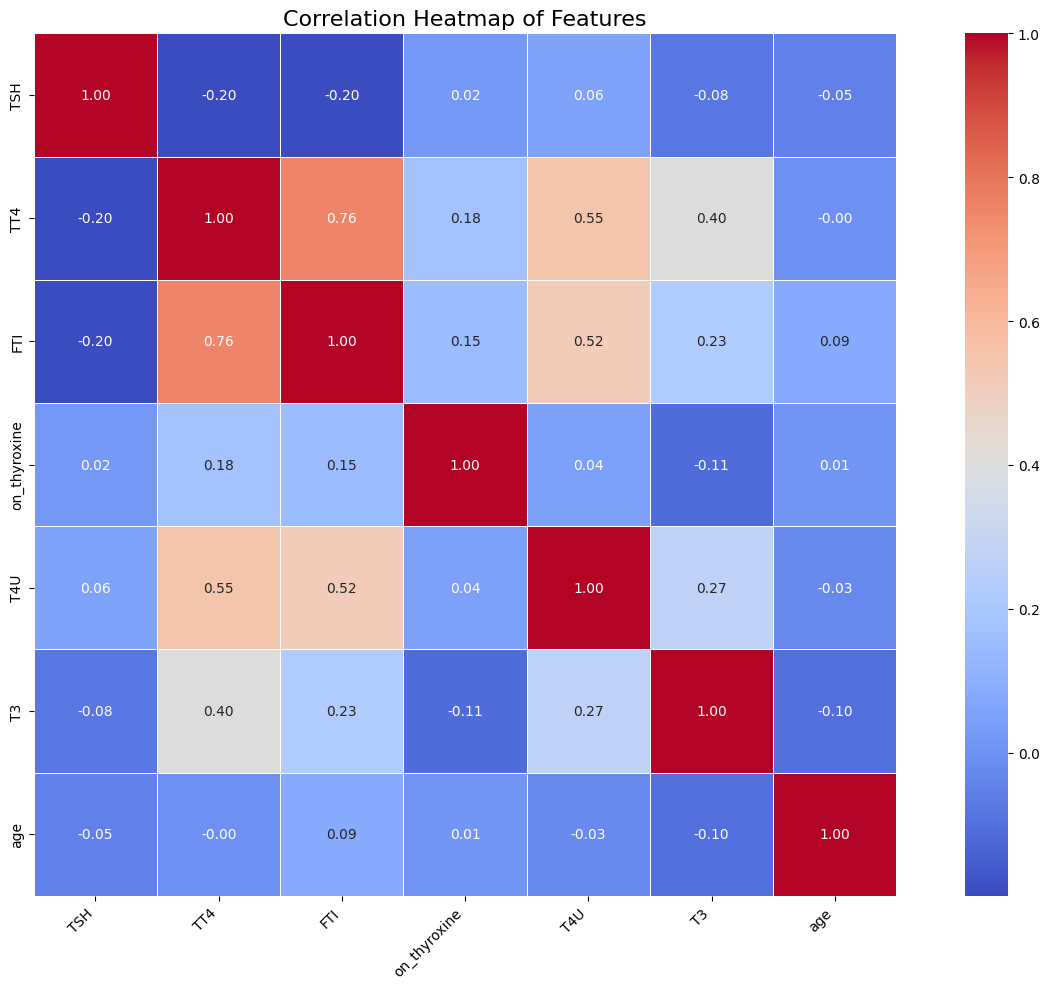

In [33]:

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(new_X, Y, test_size=0.2, stratify=Y, random_state=42)


In [35]:
# Apply SMOTE only to training set
sm = SMOTE(random_state=42)
x_train_sm , y_train_sm = sm.fit_resample(x_train, y_train)

In [36]:
# Model training
thyroid_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=3, 
)


In [37]:
thyroid_model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [38]:
training_pred = thyroid_model.predict(x_train_sm)

In [39]:
training_accuracy = accuracy_score(y_train_sm, training_pred)

In [40]:
training_accuracy

0.996709323583181

#### Testing accuracy 

In [41]:
# Evaluate testing
y_pred = thyroid_model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)

In [42]:
test_acc

0.9973082099596231

In [43]:
print(confusion_matrix(y_test, y_pred))

[[683   2]
 [  0  58]]


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       0.97      1.00      0.98        58

    accuracy                           1.00       743
   macro avg       0.98      1.00      0.99       743
weighted avg       1.00      1.00      1.00       743



In [45]:
#testing of out model 
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X[top_feature], Y, cv=cv, scoring='f1')
print("F1 Scores (5-fold CV):", scores)
print("Mean F1 Score:", scores.mean())


F1 Scores (5-fold CV): [0.92913386 0.99145299 0.96491228 0.97478992 0.96610169]
Mean F1 Score: 0.9652781482608207


In [47]:
from joblib import dump


# Save the model to a file
dump(thyroid_model, "models/thyroid_model.joblib")


['models/thyroid_model.joblib']